In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [10]:
(train_photos, train_labels), (test_photos, test_labels) = cifar10.load_data()

train_labels1 = tf.keras.utils.to_categorical(train_labels)
test_labels1 = tf.keras.utils.to_categorical(test_labels)

In [11]:
#picture augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)
datagen.fit(train_photos)

In [12]:
model_1 = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),strides=(2,2), padding= 'same', input_shape=(32, 32, 3)),  # layer 1
tf.keras.layers.SpatialDropout2D(rate=0.3),
tf.keras.layers.Activation('relu'),
tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

tf.keras.layers.Conv2D(filters=192, kernel_size=(5,5),strides=(2,2), padding= 'same'),  # layer 2
tf.keras.layers.SpatialDropout2D(rate=0.3),
tf.keras.layers.Activation('relu'),
tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(2,2), padding= 'same'),  # layer 3
tf.keras.layers.SpatialDropout2D(rate=0.3),
tf.keras.layers.Activation('relu'),
tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), padding= 'same' ),  # layer 4
tf.keras.layers.SpatialDropout2D(rate=0.3),
tf.keras.layers.Activation('relu'),
tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), padding= 'same'),  # layer 5
tf.keras.layers.SpatialDropout2D(rate = 0.3),
tf.keras.layers.Activation('relu'),
tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

# tf.keras.layers.Flatten(),  
tf.keras.layers.Conv2D(filters=4096, kernel_size=(1, 1), strides=(1,1), padding= 'same'),  # layer 6
tf.keras.layers.Dropout(rate=0.3),
tf.keras.layers.BatchNormalization(),

tf.keras.layers.Conv2D(filters=4096, kernel_size=(1, 1), strides=(1,1), padding= 'same'),   # layer 7
tf.keras.layers.Dropout(rate=0.3),
tf.keras.layers.BatchNormalization(),

tf.keras.layers.Conv2D(filters=10, kernel_size=(1, 1), strides=(1,1), padding= 'same'),
tf.keras.layers.GlobalMaxPooling2D(),
tf.keras.layers.Activation('softmax')
])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
spatial_dropout2d_5 (Spatial (None, 16, 16, 64)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 192)         307392    
_________________________________________________________________
spatial_dropout2d_6 (Spatial (None, 8, 8, 192)         0         
_________________________________________________________________
activation_7 (Activation)    (None, 8, 8, 192)        

In [13]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
loss='categorical_crossentropy',
metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
checkpoint_cb = ModelCheckpoint("modelnew.h5", save_best_only=True)

history =model_1.fit(datagen.flow(train_photos, train_labels1, batch_size=128,
         subset='training'),
         validation_data=datagen.flow(train_photos, train_labels1,
         batch_size=8, subset='validation'),steps_per_epoch = 312, epochs=150,callbacks= [checkpoint_cb])


Epoch 1/150
312/312 [==============================] - 34s 106ms/step - loss: 3.8335 - accuracy: 0.1900 - val_loss: 2.3561 - val_accuracy: 0.1574
Epoch 2/150
312/312 [==============================] - 33s 104ms/step - loss: 1.9882 - accuracy: 0.3203 - val_loss: 1.8801 - val_accuracy: 0.3739
Epoch 3/150
312/312 [==============================] - 33s 105ms/step - loss: 1.8953 - accuracy: 0.3597 - val_loss: 1.5757 - val_accuracy: 0.4305
Epoch 4/150
312/312 [==============================] - 34s 109ms/step - loss: 1.7595 - accuracy: 0.3998 - val_loss: 1.5216 - val_accuracy: 0.4572
Epoch 5/150
312/312 [==============================] - 33s 106ms/step - loss: 1.7215 - accuracy: 0.4194 - val_loss: 1.5538 - val_accuracy: 0.4485
Epoch 6/150
312/312 [==============================] - 33s 107ms/step - loss: 1.6496 - accuracy: 0.4367 - val_loss: 1.7182 - val_accuracy: 0.4690
Epoch 7/150
312/312 [==============================] - 35s 112ms/step - loss: 1.6691 - accuracy: 0.4371 - val_loss: 1.3702 -

In [15]:
datagen.fit(test_photos)

score = model_1.evaluate(datagen.flow(test_photos, test_labels1, batch_size = 128), verbose=0,callbacks=[checkpoint_cb])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5999965667724609
Test accuracy: 0.791100025177002


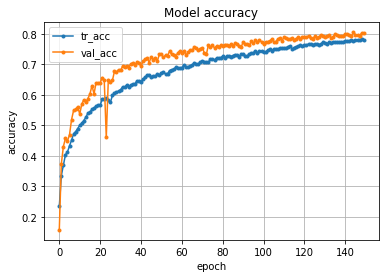

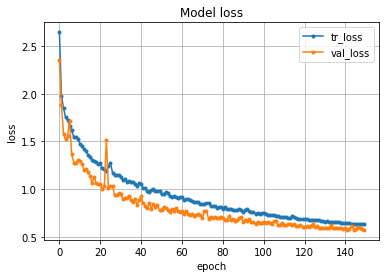

In [16]:
#accuracy plot
plt.plot(history.history['accuracy'], marker='.', label='tr_acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('Model accuracy')
plt.savefig('task5_accuracy.jpeg')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

#loss plot
plt.plot(history.history['loss'], marker='.', label='tr_loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('Model loss')
plt.savefig('task5_loss.jpeg')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()